In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
# Correcting for inflation https://palewi.re/docs/cpi/
# pip install cpi from anaconda prompt (or anaconda navigator)
import cpi

In [5]:
# read raw data
df = pd.read_csv(r'/Users/madeleinesherry/Documents/DS Practicum/endowment.csv')

In [6]:
new_end = [int(g) for g in df['endowment_needed']]
df['int_end']=new_end
df.head()

state  sum_of_gap  endowment_needed  int_end
0    AK        3277             65540    65540
1    AL        3882             77640    77640
2    AR        4000             80000    80000
3    AZ       15104            302080   302080
4    CA      193516           3870320  3870320

In [7]:
range_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]

sorted_values = pd.cut(df['int_end'], [0.0,1,10000.0,20000.0,30000,40000,50000,60000,70000,80000,90000,100000,200000,300000,500000,1000000,2000000,3000000,4000000,4200000], include_lowest=True, labels=range_labels)
df['binned']=sorted_values
df.head()

state  sum_of_gap  endowment_needed  int_end binned
0    AK        3277             65540    65540      7
1    AL        3882             77640    77640      8
2    AR        4000             80000    80000      8
3    AZ       15104            302080   302080     13
4    CA      193516           3870320  3870320     17

In [8]:
for col in df.columns:
    df[col] = df[col].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=df['state'],
    z=df['binned'].astype(str),
    locationmode='USA-states',
    colorscale= [[0, 'rgb(255,198,39)'],[1.0, 'rgb(0,40,104)']],
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Scale"
))

fig.update_layout(
    title_text='Endowment Needed by State',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [25]:
df1 = pd.read_csv(r'/Users/madeleinesherry/Documents/DS Practicum/all endowment.csv')

new_end = [int(g) for g in df1['region_end']]
df1['int_end']=new_end
df1.head()

state  sum_of_gap  endowment_needed  region_end  int_end
0    AK      3277.0           65540.0     3350580  3350580
1    AL      3882.0           77640.0      771980   771980
2    AR      4000.0           80000.0      771980   771980
3    AZ     15104.0          302080.0     1186860  1186860
4    CA    193516.0         3870320.0     3870320  3870320

In [26]:
range_labels = ["0", "1", "2", "3", "4", "5", "6", "7"]

sorted_values = pd.cut(df1['int_end'], [0.0,1,1000000,1181000,1190000,1900000,3600000,3900000,4300000], include_lowest=True, labels=range_labels)
df1['binned']=sorted_values
df1.head()

state  sum_of_gap  endowment_needed  region_end  int_end binned
0    AK      3277.0           65540.0     3350580  3350580      5
1    AL      3882.0           77640.0      771980   771980      1
2    AR      4000.0           80000.0      771980   771980      1
3    AZ     15104.0          302080.0     1186860  1186860      3
4    CA    193516.0         3870320.0     3870320  3870320      6

In [32]:
# had to change it to navy instead of dark blue to hike up the contrast

for col in df1.columns:
    df1[col] = df1[col].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=df1['state'],
    z=df1['binned'].astype(str),
    locationmode='USA-states',
    colorscale= [[0, 'rgb(108,178,226)'],[1.0, 'rgb(1,14,48)']],
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Scale"
))

fig.update_layout(
    autosize = False,
    width = 2100,
    height = 1500,
    #title_text='Endowment Needed by Region',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

# If we want to have states labeled, we add the following code
#fig.add_scattergeo(
#    locations=df1['state'],
#    locationmode="USA-states", 
#    text=df1['state'],
#    mode='text',
#)

fig.show()

In [16]:
for col in df1.columns:
    df1[col] = df1[col].astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=df1['state'],
    z=df1['region_end'].astype(str),
    locationmode='USA-states',
    colorscale= [[0, 'rgb(108,178,226)'],[1.0, 'rgb(0,40,104)']],
    autocolorscale=False,
    marker_line_color='white', # line markers between states
    colorbar_title="Scale"
))

fig.update_layout(
    autosize = False,
    width = 2100,
    height = 1500,
    #title_text='Endowment Needed by Region',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

# If we want to have states labeled, we add the following code
#fig.add_scattergeo(
#    locations=df1['state'],
#    locationmode="USA-states", 
#    text=df1['state'],
#    mode='text',
#)

fig.show()

In [40]:
fig.write_image("image1.png")

In [38]:
img_bytes = fig.to_image(format="png", width=3000, height=4000, scale=2)
type(img_bytes)

bytes

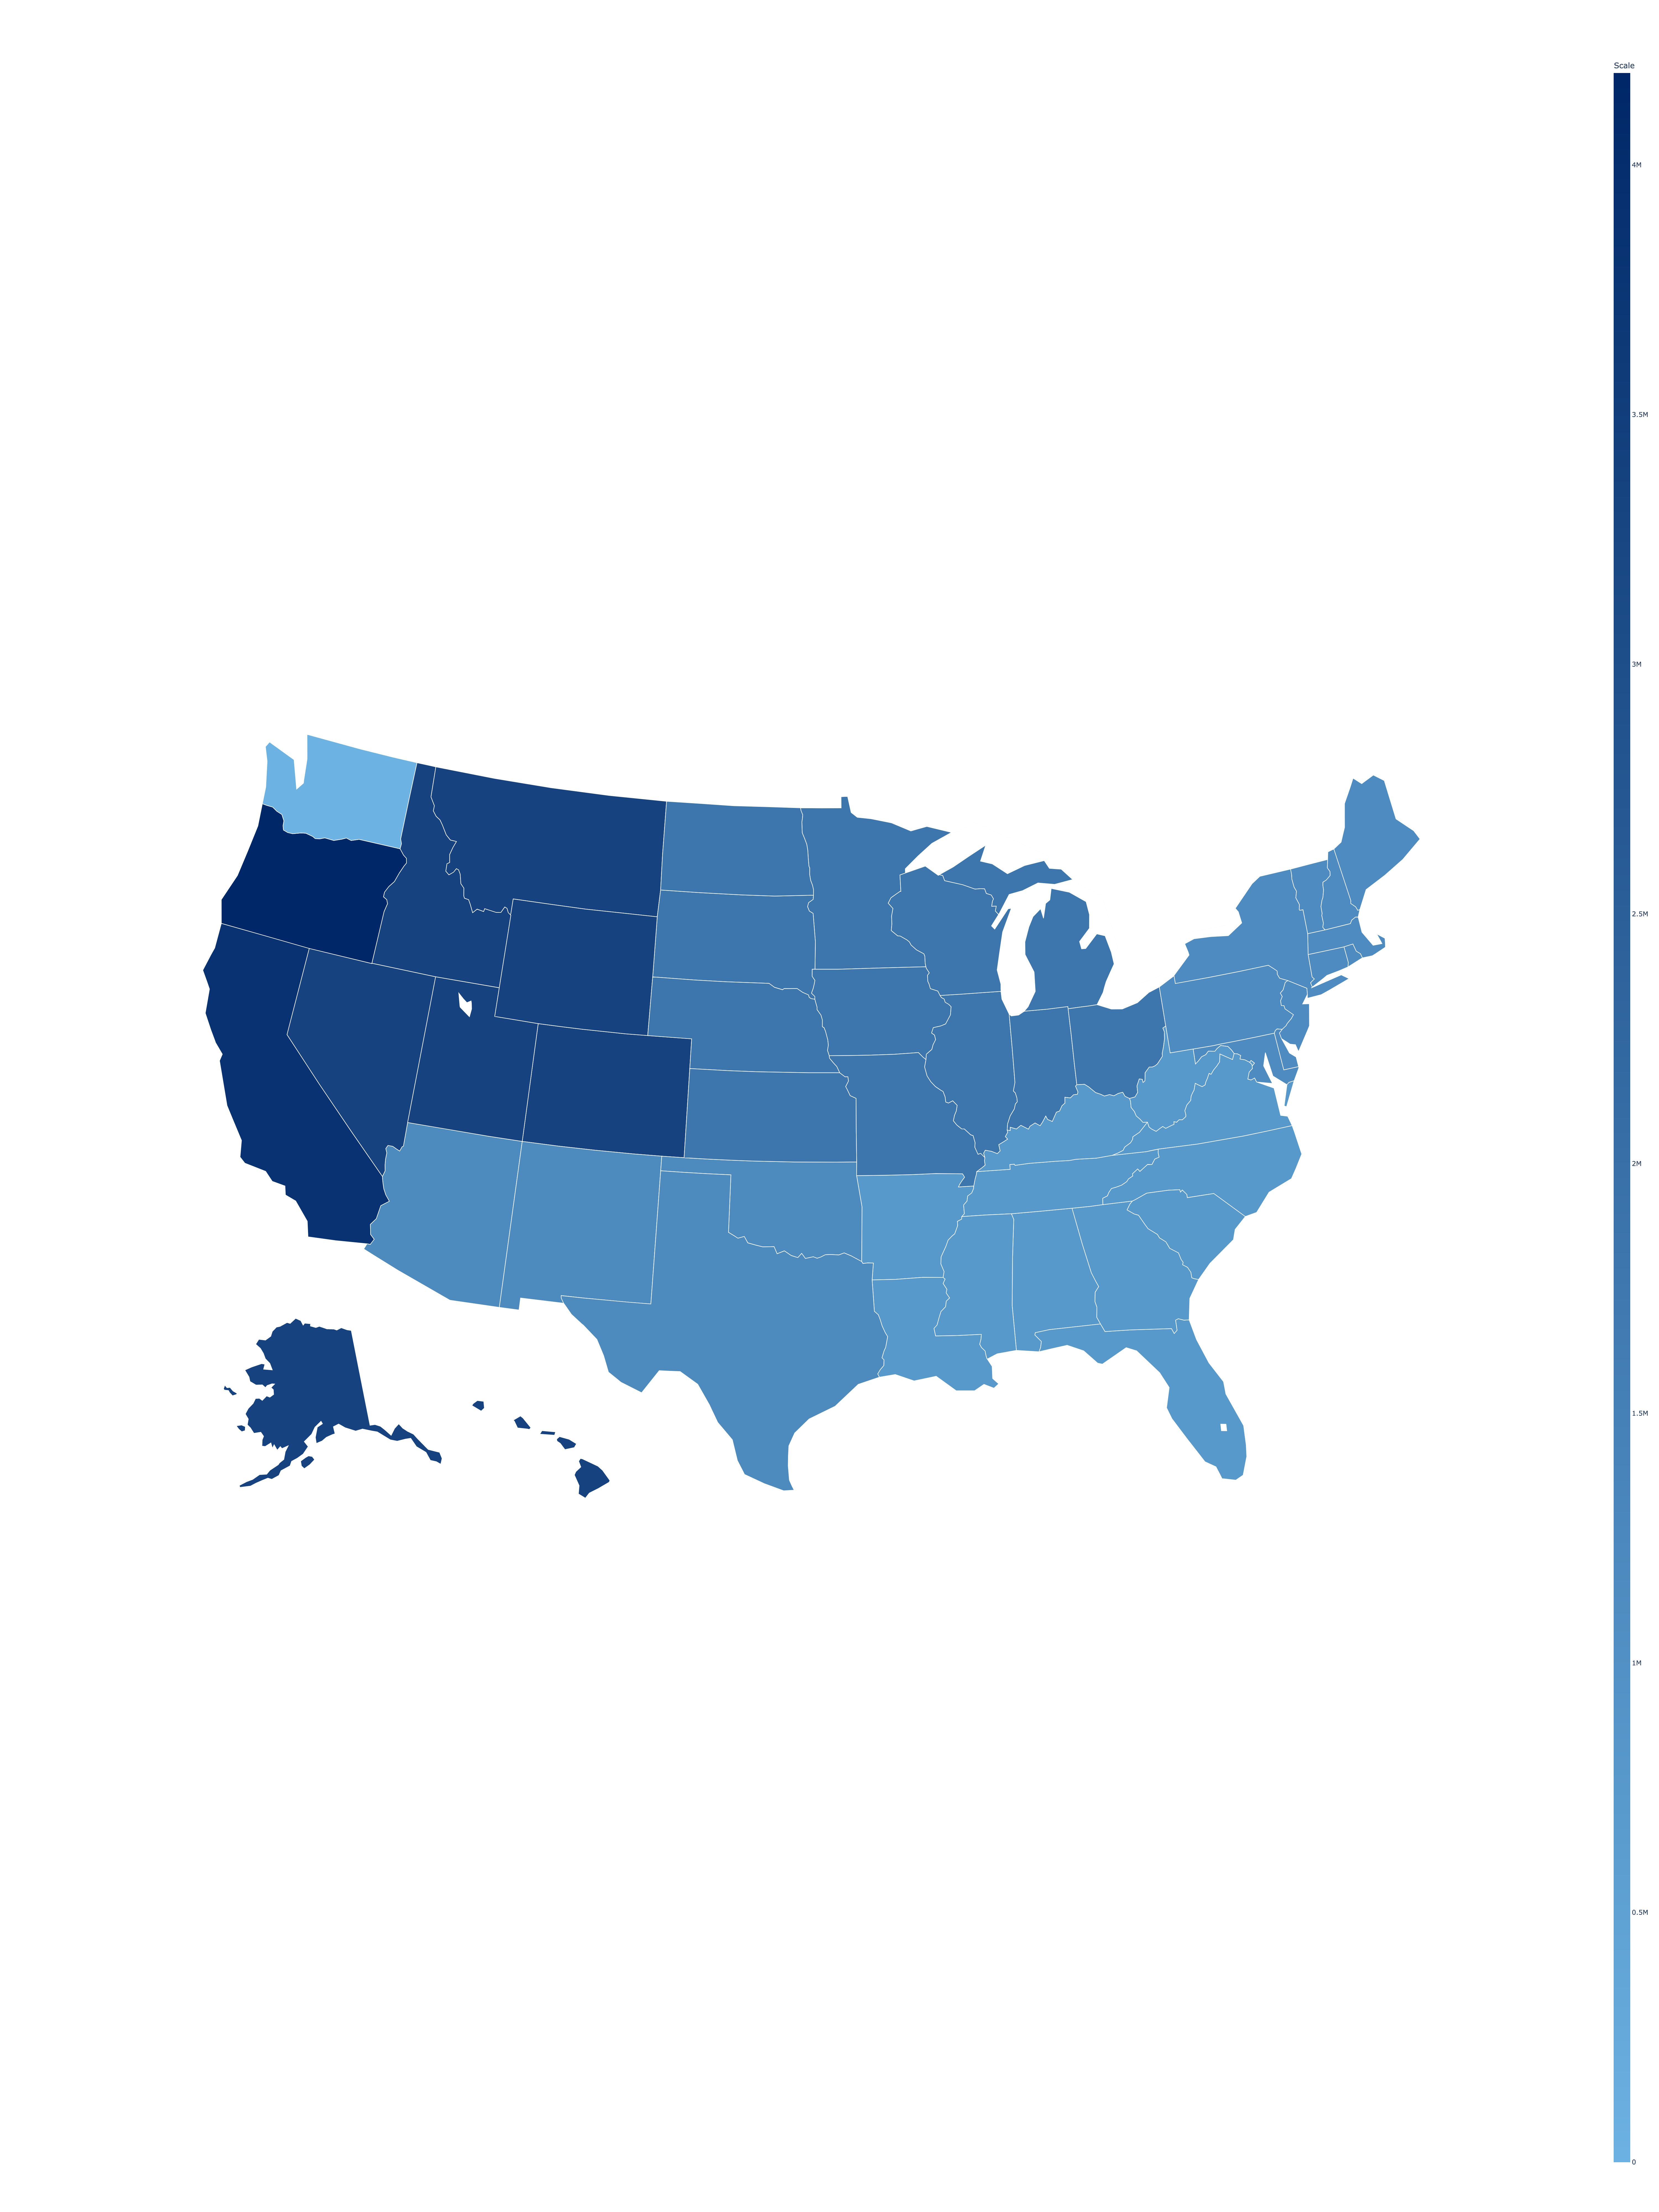

In [31]:
from IPython.display import Image
Image(img_bytes)